In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Let's start by loading the expanded dataset and taking a preliminary look at its contents
# We will display the first few rows to understand the structure and types of data it contains
df = pd.read_csv('./Expanded_data_with_more_features.csv')
df.head()



,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [24]:
# Checking for missing values
missing_values = df.isnull().sum()

# Getting summary statistics for the numerical columns
print("INFO")
print(df.info())
print("DESCRIBE")

summary_statistics = df.describe()

missing_values, summary_statistics



INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object

(Unnamed: 0                0
 Gender                    0
 EthnicGroup            1840
 ParentEduc             1845
 LunchType                 0
 TestPrep               1830
 ParentMaritalStatus    1190
 PracticeSport           631
 IsFirstChild            904
 NrSiblings             1572
 TransportMeans         3134
 WklyStudyHours          955
 MathScore                 0
 ReadingScore              0
 WritingScore              0
 dtype: int64,
          Unnamed: 0    NrSiblings     MathScore  ReadingScore  WritingScore
 count  30641.000000  29069.000000  30641.000000  30641.000000  30641.000000
 mean     499.556607      2.145894     66.558402     69.377533     68.418622
 std      288.747894      1.458242     15.361616     14.758952     15.443525
 min        0.000000      0.000000      0.000000     10.000000      4.000000
 25%      249.000000      1.000000     56.000000     59.000000     58.000000
 50%      500.000000      2.000000     67.000000     70.000000     69.000000
 75%      7

## Dataset Overview
The dataset consists of 30,641 entries and 15 columns.
Data types include integer (int64), floating point (float64), and object (object), the types that aren't numbers are going to be parsed later on.
Muliple attributes are missing


## Handling null values

In [25]:
# Replace missing values in object columns with 'Unknown'
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    df[col].fillna('Unknown', inplace=True)

# Replace missing values in numeric columns with the mean, rounded to the nearest integer
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    df[col].fillna(round(df[col].mean()), inplace=True)

df.head()


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,Unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,Unknown,married,sometimes,yes,0.0,Unknown,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,Unknown,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [26]:
missing_values = df.isnull().sum()
missing_values  #Check that the previous snippet worked nice

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [27]:

df.drop(columns=['Unnamed: 0'], inplace=True)

# Assuming df is your DataFrame
# One-Hot Encoding for nominal variables
nominal_columns = ['Gender', 'EthnicGroup', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'TransportMeans']
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

# Label Encoding for ordinal variables
label_encoder = LabelEncoder()
ordinal_columns = [ 'PracticeSport', 'IsFirstChild', 'ParentEduc', 'WklyStudyHours']
for col in ordinal_columns:
    df[col] = label_encoder.fit_transform(df[col])
    
columns_to_drop = [ 'PracticeSport', 'IsFirstChild', 'ParentEduc', 'WklyStudyHours']
df = df.drop(columns=columns_to_drop)

# View the transformed DataFrame
df.head()


,NrSiblings,MathScore,ReadingScore,WritingScore,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,LunchType_standard,TestPrep_completed,TestPrep_none,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,TransportMeans_private,TransportMeans_school_bus
0,3.0,71,71,74,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True
1,0.0,69,90,88,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False
2,4.0,87,93,91,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True
3,1.0,45,56,42,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False
4,0.0,76,78,75,True,False,False,True,False,False,True,False,True,False,True,False,False,False,True


In [28]:
print("INFO")
print(df.info())

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NrSiblings                    30641 non-null  float64
 1   MathScore                     30641 non-null  int64  
 2   ReadingScore                  30641 non-null  int64  
 3   WritingScore                  30641 non-null  int64  
 4   Gender_male                   30641 non-null  bool   
 5   EthnicGroup_group A           30641 non-null  bool   
 6   EthnicGroup_group B           30641 non-null  bool   
 7   EthnicGroup_group C           30641 non-null  bool   
 8   EthnicGroup_group D           30641 non-null  bool   
 9   EthnicGroup_group E           30641 non-null  bool   
 10  LunchType_standard            30641 non-null  bool   
 11  TestPrep_completed            30641 non-null  bool   
 12  TestPrep_none                 30641 non-null  bool   
 

In [29]:
#Makes more sense to have siblings as an int
df['NrSiblings'] = df['NrSiblings'].astype(int)

By the time we won't scale the data because we are not planning to use algorithms sensitive to the scale of the data, like SVMs, K-nearest neighbors, or neural networks.

In [30]:


# Set up the visualization layout
sns.set(style="whitegrid")
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']


In [31]:
print(df[numerical_columns].corr())

              NrSiblings  MathScore  ReadingScore  WritingScore
NrSiblings      1.000000  -0.001084     -0.000796     -0.002375
MathScore      -0.001084   1.000000      0.817825      0.807118
ReadingScore   -0.000796   0.817825      1.000000      0.952584
WritingScore   -0.002375   0.807118      0.952584      1.000000


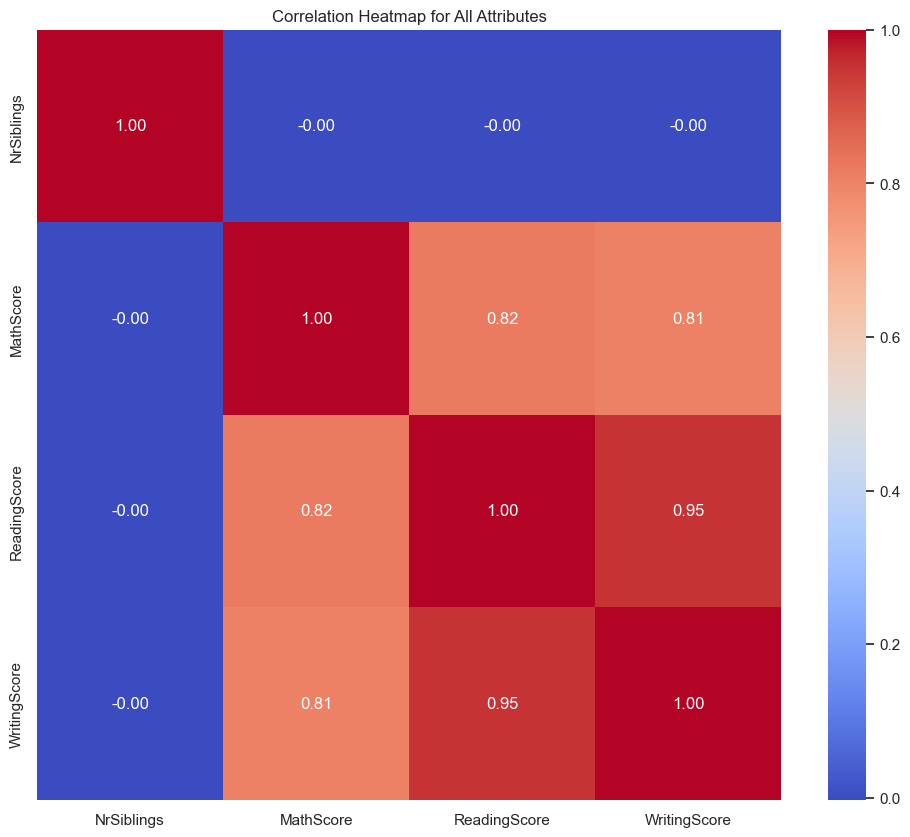

In [32]:
# Generate a correlation heatmap for all attributes in the DataFrame
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for All Attributes')
plt.show()

# Findings

## NrSiblings and Academic Scores
- **Correlation with Academic Scores**:
  - The number of siblings (`NrSiblings`) shows very weak negative correlations with all academic scores:
    - `MathScore`: -0.001084
    - `ReadingScore`: -0.000796
    - `WritingScore`: -0.002375
  - This suggests that the number of siblings a subject has is nearly unrelated to their academic performance in math, reading, and writing.

## MathScore, ReadingScore, and WritingScore
- **Inter-correlations**:
  - `MathScore` and `ReadingScore` have a strong positive correlation (0.817825), indicating that students who perform well in math tend to also perform well in reading.
  - `MathScore` and `WritingScore` are also strongly positively correlated (0.807118), suggesting a similar performance pattern between math and writing skills.
  - The strongest positive correlation is observed between `ReadingScore` and `WritingScore` (0.952584). This indicates that reading and writing abilities are very closely linked, with high performance in one typically associated with high performance in the other.


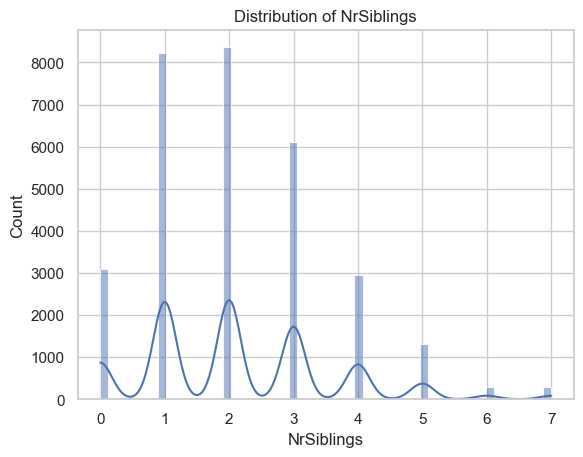

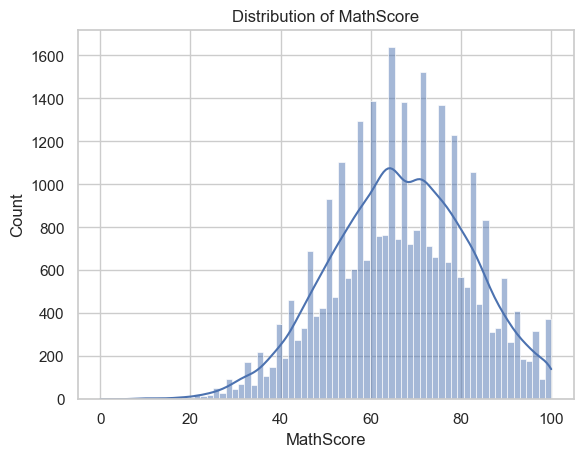

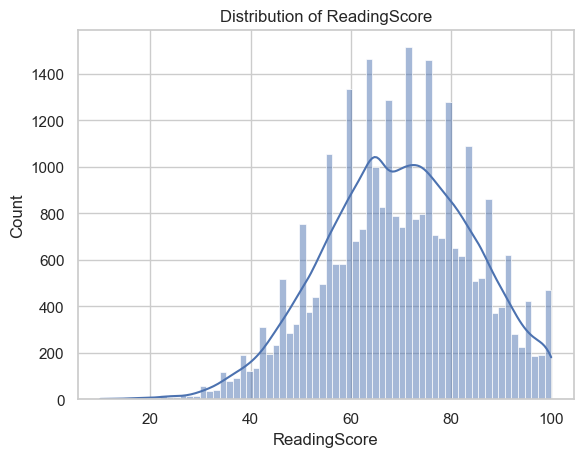

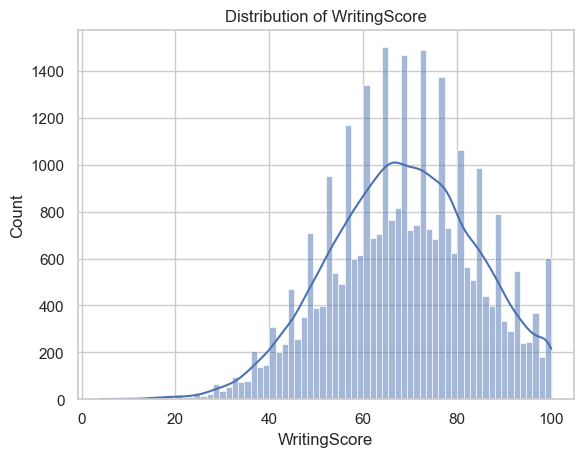

In [33]:


# Set up the visualization layout
sns.set(style="whitegrid")

# Histograms/Density Plots
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



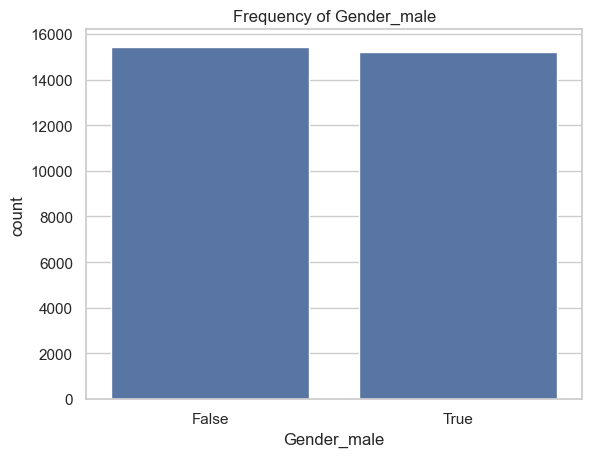

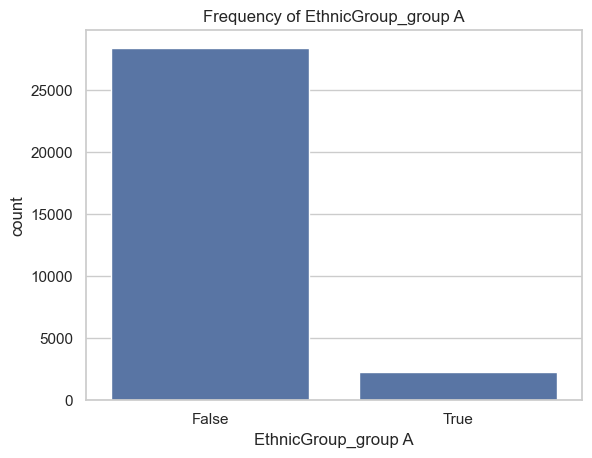

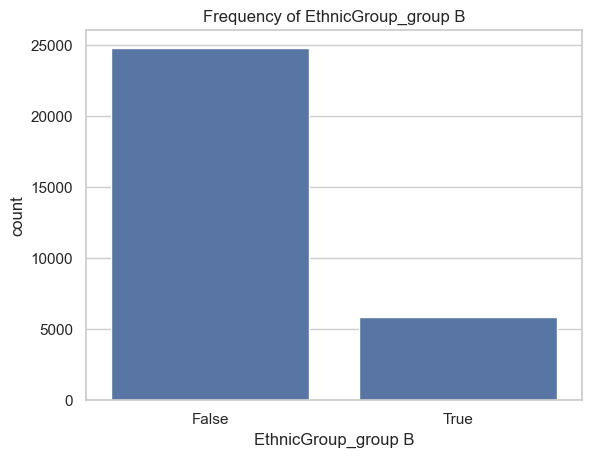

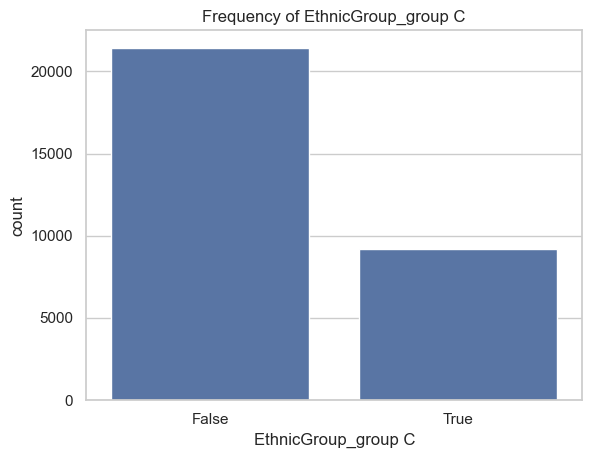

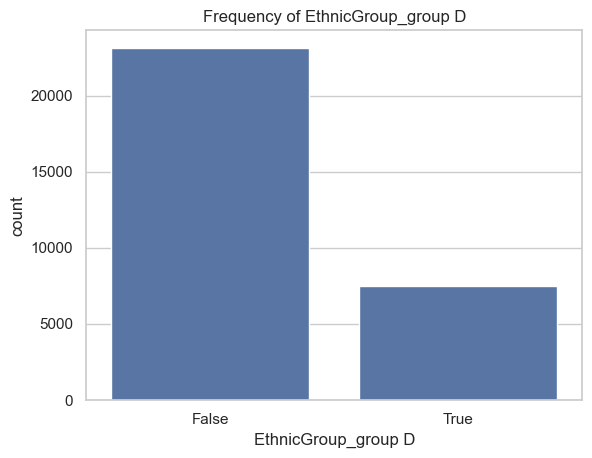

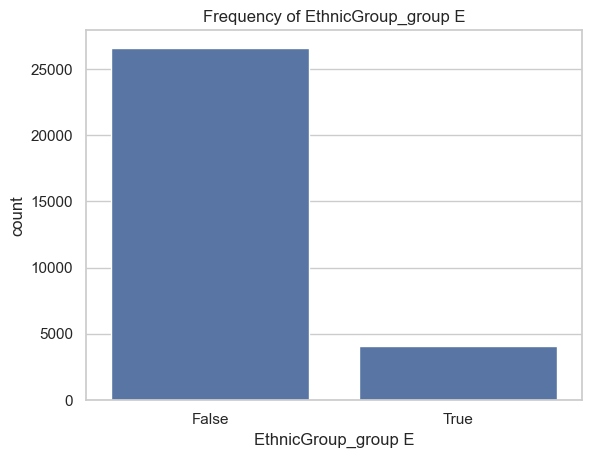

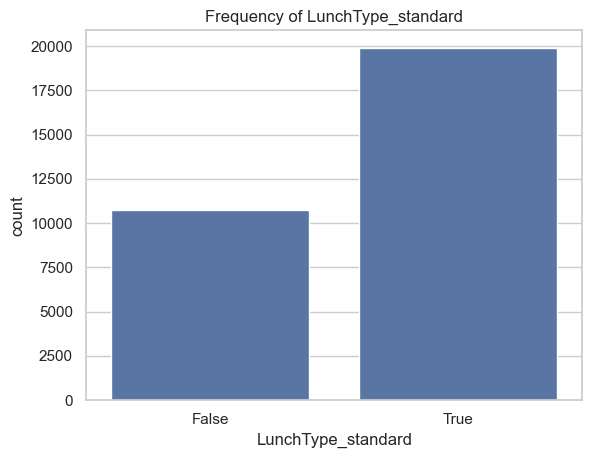

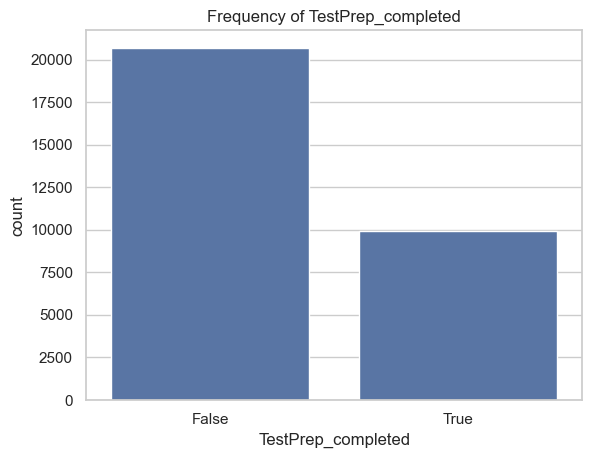

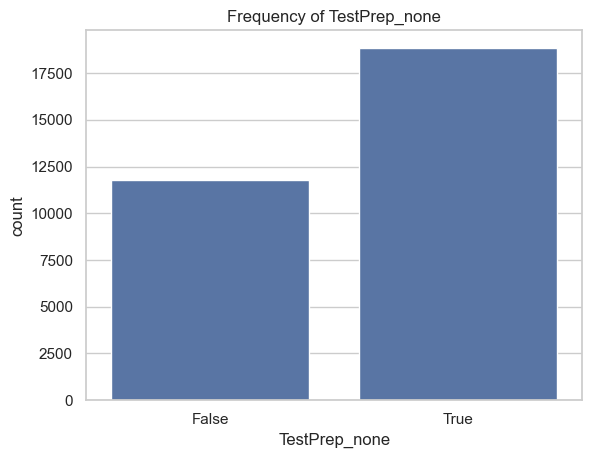

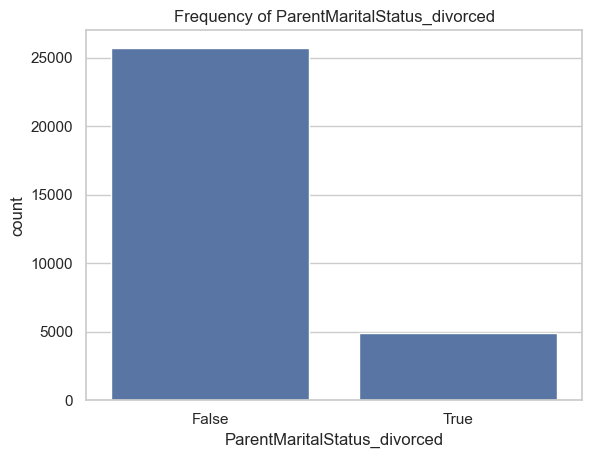

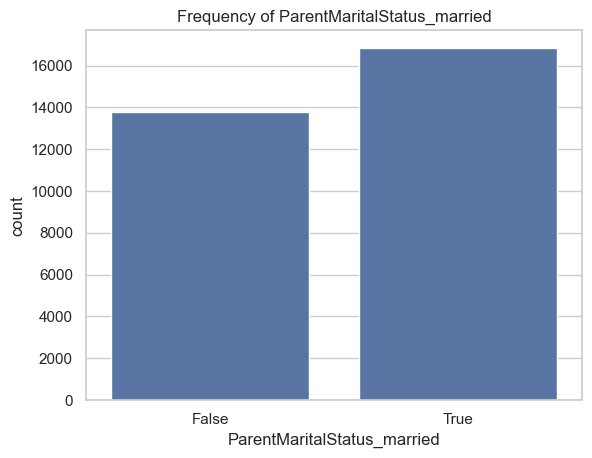

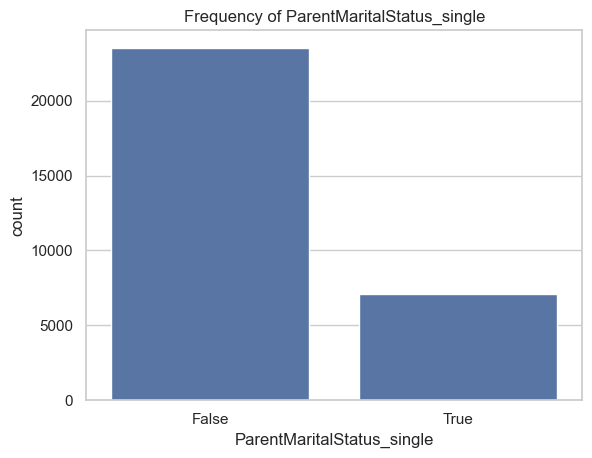

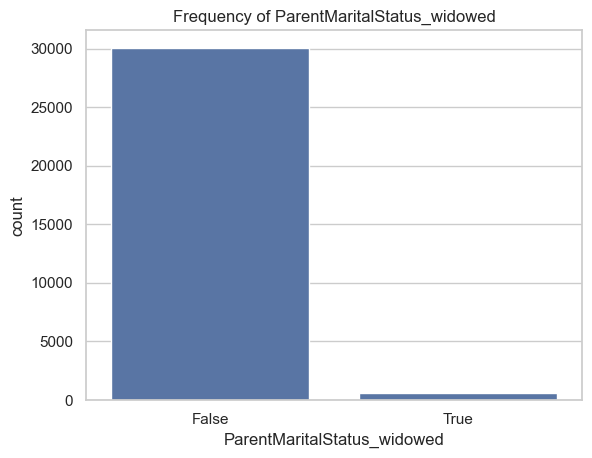

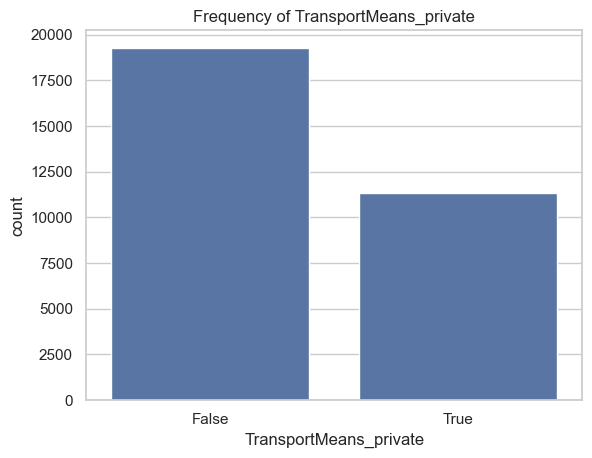

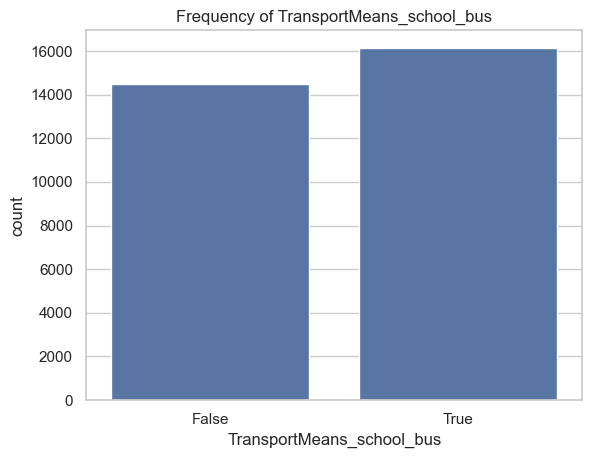

In [34]:

# Bar Charts for Boolean Variables
boolean_columns = [col for col in df.columns if df[col].dtype == 'bool']
for col in boolean_columns:
    sns.countplot(x=df[col])
    plt.title(f'Frequency of {col}')
    plt.show()



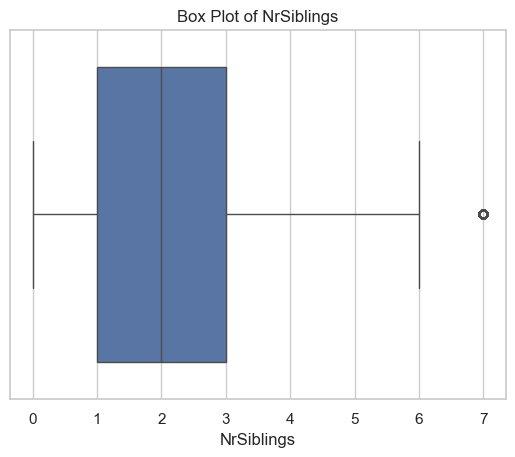

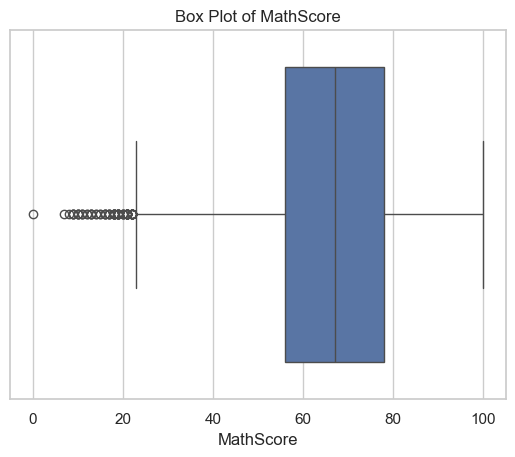

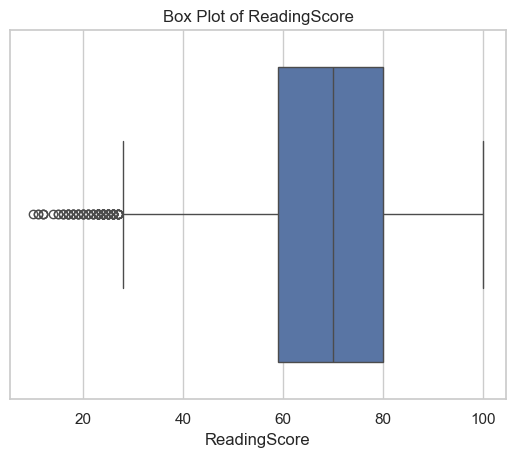

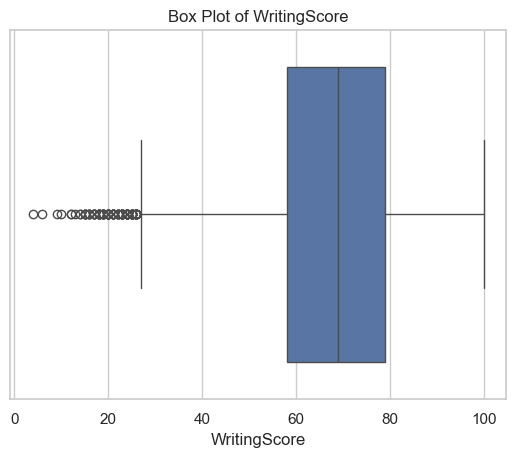

In [35]:
# Box Plots for Numerical Variables
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()



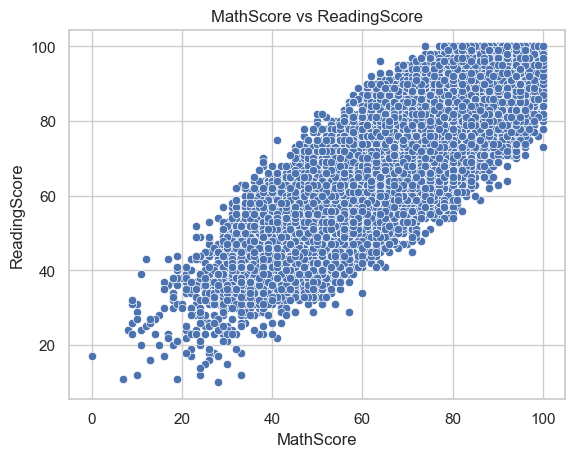

In [36]:
# Scatter Plots
# Example: MathScore vs ReadingScore
sns.scatterplot(x='MathScore', y='ReadingScore', data=df)
plt.title('MathScore vs ReadingScore')
plt.show()


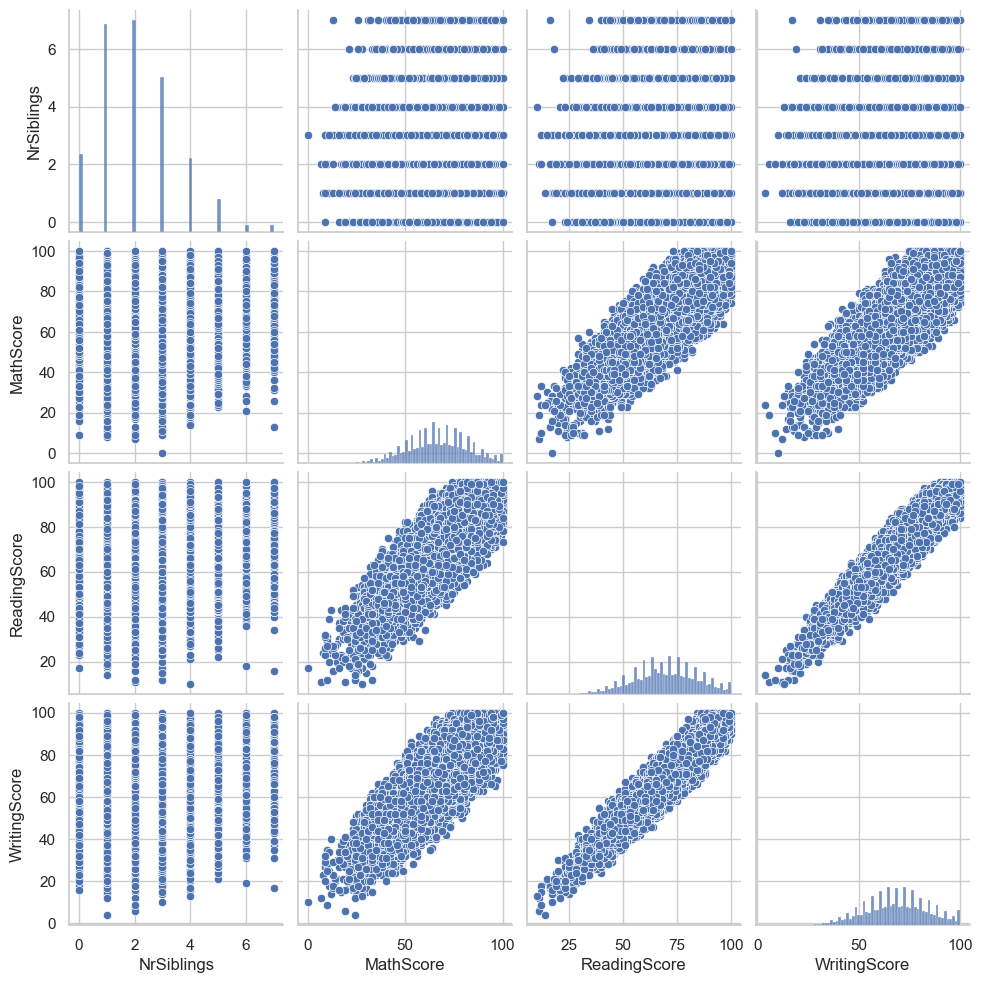

In [37]:

# Pair Plot
sns.pairplot(df[numerical_columns])
plt.show()

# EDA Conclusions and Next Steps

## Understanding the Role of NrSiblings in Academic Performance
- **Analyzing Sibling Count Impact**:
  - It was observed that the number of siblings (`NrSiblings`) has a very weak negative correlation with academic scores (`MathScore`, `ReadingScore`, `WritingScore`). This leads to the conclusion that sibling count may not significantly influence a student's academic performance in these subjects.
  - The focus will be shifted more towards individual student attributes rather than family-related attributes when exploring academic performance.

## Exploring the Link between Different Academic Abilities
- **Examining Correlations Among Scores**:
  - Strong positive correlations were identified among `MathScore`, `ReadingScore`, and `WritingScore`, indicating a significant overlap in the skills required for these subjects.
  - The next steps will include considering that students who excel in one subject area are likely to perform well in others, potentially due to shared factors like study habits or educational environments.

# Plans for Feature Engineering

## Developing Combined Features
- **Creating Linguistic Ability Indicators**:
  - A new feature combining reading and writing scores, either as an average or a total score, is planned to be created. This will help in capturing the overall linguistic ability of students, considering their strong correlation.

## Applying Dimensionality Reduction Techniques
- **Utilizing PCA in High Multicollinearity Scenarios**:
  - Principal Component Analysis (PCA) will be used in situations where multicollinearity is evident among features. This approach will allow for the reduction of the feature set while retaining the most important information.

## Making Strategic Decisions on Feature Inclusion
- **Optimizing for Model Interpretability**:
  - A selective approach to feature inclusion in models is intended, especially choosing either ReadingScore or WritingScore in cases where maintaining model interpretability and reducing redundancy is crucial.

## Investigating Non-linear Patterns
- **Looking Beyond Linear Relationships**:
  - An exploration of non-linear relationships using methods like polynomial features or interaction terms is planned to discover more complex patterns in the data.

## Integrating Contextual Factors
- **Combining Diverse Data Points**:
  - Given the limited correlation of `NrSiblings` with academic scores, an exploration of how it interacts with other factors such as socioeconomic status or parental education levels is anticipated, aiming to unearth more nuanced insights.


In [38]:
# Save df for later modelling
df.to_csv('modified_dataset.csv', index=False)
